
# Project: Investigate a Dataset - [tmdb movies]


# Introduction


In this analysis, we will work on tmdb movies file. In fact, it contains classification for 10866 movie covering the period between 1966 till 2015. We can find some informations about budget, revenue & genres; we gonna explore every single info in details through our analysis & here are the main questions to be anaswered:

* 1-Which genres are most popular? 
* 2-Does the most of movies get high or low revenue?
* 3-Who are the 10 best directors, movies & years valued by revenue ?

# Importing the most useful libraries that we gonna use

In [48]:
import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Wrangling
** importing the data, overview the content & see the data distribution via histograms

In [49]:
df = pd.read_csv('tmdb-movies.csv', index_col="id")
df.head(2)


,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


Viewing the header of the data & what it contains

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj       

Contains 10866 columns with 20 rows; 9 columns missing some data 

In [51]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


budget, revenue, runtime, budget_adj & revenue_adj contain data with zero value, we will see how we gonna deal with this data in the upcoming codes

In [52]:
df['release_year'].unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966])

The data covers years from 1966 till 2015

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc68d44e4e0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc68d286dd8>]], dtype=object)

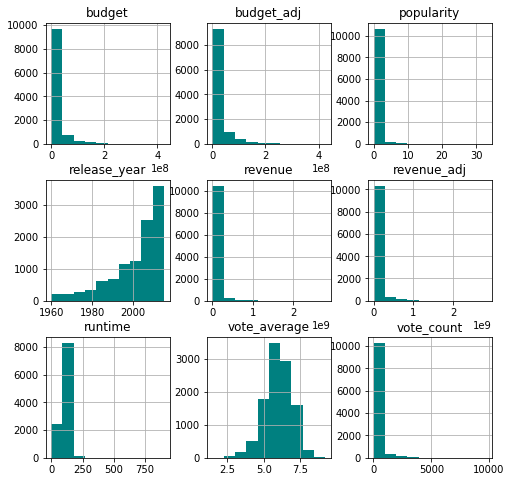

In [53]:
df.hist(figsize = (8,8), color='teal')

Through this data distribution, we found that huge amount of the data is with zero value, vote average is normal distributed & the release year is left skewed. 

# Data Cleaning

** In this step, we will clean the data to be suitable to the analysis process 
* 1- Checking the duplicated data( there was only 1 duplicated value & we removed it)
* 2- There is some missing values in the genres & production companies, so we gonna remove them as we may use the data in our analysis
* 3- Dropping the unecessary colums that I may not use 

In [54]:
sum(df.duplicated())

1

discovering the amount of duplicated data & it's only 1 

In [55]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

Removing the duplicated value

In [56]:
df['genres'].dropna(inplace=True)
df['genres'].isnull().sum().any()

False

Dropping the null data from genres

In [57]:
df['production_companies'].dropna(inplace=True)
df['production_companies'].isnull().sum().any()

False

Dropping the null data from production companies

In [58]:
df.drop(['cast', 'homepage', 'tagline', 'keywords', 'overview', 'release_date','vote_count','vote_average', 'budget_adj', 'revenue_adj'], axis=1, inplace =True)

Dropping some coulumns that I will not use in my analysis

In [59]:
df.head(1)

,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_year
id,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015


Showing the header to confirm that the columns have been dropped successfully 

# # Exploratory Data Analysis
** Now gonna set questions & answer them via visualization & get the highlights regarding this data
* I tried to run plot using matplotlib & seaborn, but got seaborn error, U will find detailed info in the upcoming codes



# Q1 : Which genres are most popular ? 
** as we see before genres are divided by this sign (|), so firstly, we will split genres, to get valid data to be analysed 
   after creating new column "genres_adj", we will merge the splited data to main data & remove the old column "genres"

In [60]:
genres_df = df['genres'].str.split("|", expand=True)
genres_df.head(5)

,0,1,2,3,4
id,,,,,
135397,Action,Adventure,Science Fiction,Thriller,None
76341,Action,Adventure,Science Fiction,Thriller,None
262500,Adventure,Science Fiction,Thriller,None,None
140607,Action,Adventure,Science Fiction,Fantasy,None
168259,Action,Crime,Thriller,None,None


Trying to split the data in genres to easily analysis it & assing the result to new variable

In [61]:
genres_df = genres_df.stack()

genres_df = pd.DataFrame(genres_df)
genres_df.head()

0
id                       
135397 0           Action
       1        Adventure
       2  Science Fiction
       3         Thriller
76341  0           Action

Using pandas to transfer the new variable to dataframe to perform some pandas functions, then we gonna show the header to see the data we extracted

In [62]:
genres_df.rename(columns={0:'genres_adj'}, inplace=True)
genres_df.genres_adj.value_counts()

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres_adj, dtype: int64

Create new column with the genres after we modified it & count the values 

In [63]:
df_merged = df.merge(genres_df,left_index=True, right_index=True)
df_merged.head()

imdb_id  popularity     budget     revenue      original_title  \
id                                                                           
135397 0  tt0369610   32.985763  150000000  1513528810      Jurassic World   
       1  tt0369610   32.985763  150000000  1513528810      Jurassic World   
       2  tt0369610   32.985763  150000000  1513528810      Jurassic World   
       3  tt0369610   32.985763  150000000  1513528810      Jurassic World   
76341  0  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   

                 director  runtime                                     genres  \
id                                                                              
135397 0  Colin Trevorrow      124  Action|Adventure|Science Fiction|Thriller   
       1  Colin Trevorrow      124  Action|Adventure|Science Fiction|Thriller   
       2  Colin Trevorrow      124  Action|Adventure|Science Fiction|Thriller   
       3  Colin Trevorrow      124  Action|Adventure|Science Fiction|Thriller   
76341  0    George Miller      120  Action|Adventure|Science Fiction|Thriller   

                                       production_companies  release_year  \
id                                                                          
135397 0  Universal Studios|Amblin Entertainment|Legenda...          2015   
       1  Universal Studios|Amblin Entertainment|Legenda...          2015   
       2  Universal Studios|Amblin Entertainment|Legenda...          2015   
       3  Universal Studios|Amblin Entertainment|Legenda...          2015   
76341  0  Village Roadshow Pictures|Kennedy Miller Produ...          2015   

               genres_adj  
id                         
135397 0           Action  
       1        Adventure  
       2  Science Fiction  
       3         Thriller  
76341  0           Action

Create new variable to append the data that we have modified its genre with the main data 

In [64]:
df_merged.drop('genres', axis=1, inplace=True)
df_merged.head(5)

imdb_id  popularity     budget     revenue      original_title  \
id                                                                           
135397 0  tt0369610   32.985763  150000000  1513528810      Jurassic World   
       1  tt0369610   32.985763  150000000  1513528810      Jurassic World   
       2  tt0369610   32.985763  150000000  1513528810      Jurassic World   
       3  tt0369610   32.985763  150000000  1513528810      Jurassic World   
76341  0  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   

                 director  runtime  \
id                                   
135397 0  Colin Trevorrow      124   
       1  Colin Trevorrow      124   
       2  Colin Trevorrow      124   
       3  Colin Trevorrow      124   
76341  0    George Miller      120   

                                       production_companies  release_year  \
id                                                                          
135397 0  Universal Studios|Amblin Entertainment|Legenda...          2015   
       1  Universal Studios|Amblin Entertainment|Legenda...          2015   
       2  Universal Studios|Amblin Entertainment|Legenda...          2015   
       3  Universal Studios|Amblin Entertainment|Legenda...          2015   
76341  0  Village Roadshow Pictures|Kennedy Miller Produ...          2015   

               genres_adj  
id                         
135397 0           Action  
       1        Adventure  
       2  Science Fiction  
       3         Thriller  
76341  0           Action

Dropping the old column " genres" which was containing the data separated with (|) & insread we will deal with the new column we created with the separated data " genres_adj"

Text(0,0.5,'Index')

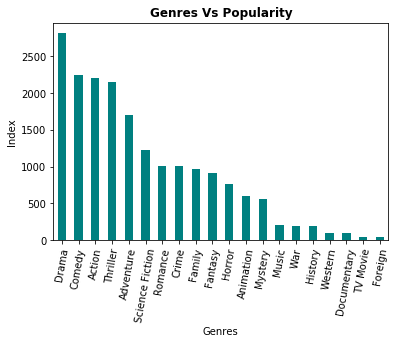

In [65]:
df_merged.groupby('genres_adj').popularity.sum().sort_values(ascending=False).plot(kind='bar', color ='teal' )
plt.title('Genres Vs Popularity', fontsize=12, fontdict={"weight": "bold"})
plt.xlabel('Genres')
plt.xticks(rotation = 80)
plt.ylabel('Index')

Through this visaul, we could find that the most popular genres are drama, comedy, action & thriller

# Q2 : Does the most of movies get high or low revenue?
** To answer this question, we should overview the 2 columns needed; we will found that there are some valuse with 0, so we will use query to filter the data & exclude any zero values

In [66]:
df_merged['revenue'].unique

<bound method Series.unique of id       
135397  0    1513528810
        1    1513528810
        2    1513528810
        3    1513528810
76341   0     378436354
        1     378436354
        2     378436354
        3     378436354
262500  0     295238201
        1     295238201
        2     295238201
140607  0    2068178225
        1    2068178225
        2    2068178225
        3    2068178225
168259  0    1506249360
        1    1506249360
        2    1506249360
281957  0     532950503
        1     532950503
        2     532950503
        3     532950503
87101   0     440603537
        1     440603537
        2     440603537
        3     440603537
286217  0     595380321
        1     595380321
        2     595380321
211672  0    1156730962
                ...    
15598   1             0
        2             0
31602   0             0
        1             0
        2             0
13343   0             0
        1             0
        2             0
        3             0

Discovering the revenue unique data

In [67]:
df_merged['budget'].unique

<bound method Series.unique of id       
135397  0    150000000
        1    150000000
        2    150000000
        3    150000000
76341   0    150000000
        1    150000000
        2    150000000
        3    150000000
262500  0    110000000
        1    110000000
        2    110000000
140607  0    200000000
        1    200000000
        2    200000000
        3    200000000
168259  0    190000000
        1    190000000
        2    190000000
281957  0    135000000
        1    135000000
        2    135000000
        3    135000000
87101   0    155000000
        1    155000000
        2    155000000
        3    155000000
286217  0    108000000
        1    108000000
        2    108000000
211672  0     74000000
               ...    
15598   1            0
        2            0
31602   0            0
        1            0
        2            0
13343   0       700000
        1       700000
        2       700000
        3       700000
20277   0            0
        1       

Discovering the budget unique data

In [68]:
df_merged = df_merged.query('revenue != 0')
df_merged

imdb_id  popularity     budget     revenue  \
id                                                       
135397 0  tt0369610   32.985763  150000000  1513528810   
       1  tt0369610   32.985763  150000000  1513528810   
       2  tt0369610   32.985763  150000000  1513528810   
       3  tt0369610   32.985763  150000000  1513528810   
76341  0  tt1392190   28.419936  150000000   378436354   
       1  tt1392190   28.419936  150000000   378436354   
       2  tt1392190   28.419936  150000000   378436354   
       3  tt1392190   28.419936  150000000   378436354   
262500 0  tt2908446   13.112507  110000000   295238201   
       1  tt2908446   13.112507  110000000   295238201   
       2  tt2908446   13.112507  110000000   295238201   
140607 0  tt2488496   11.173104  200000000  2068178225   
       1  tt2488496   11.173104  200000000  2068178225   
       2  tt2488496   11.173104  200000000  2068178225   
       3  tt2488496   11.173104  200000000  2068178225   
168259 0  tt2820852    9.335014  190000000  1506249360   
       1  tt2820852    9.335014  190000000  1506249360   
       2  tt2820852    9.335014  190000000  1506249360   
281957 0  tt1663202    9.110700  135000000   532950503   
       1  tt1663202    9.110700  135000000   532950503   
       2  tt1663202    9.110700  135000000   532950503   
       3  tt1663202    9.110700  135000000   532950503   
87101  0  tt1340138    8.654359  155000000   440603537   
       1  tt1340138    8.654359  155000000   440603537   
       2  tt1340138    8.654359  155000000   440603537   
       3  tt1340138    8.654359  155000000   440603537   
286217 0  tt3659388    7.667400  108000000   595380321   
       1  tt3659388    7.667400  108000000   595380321   
       2  tt3659388    7.667400  108000000   595380321   
211672 0  tt2293640    7.404165   74000000  1156730962   
...             ...         ...        ...         ...   
24961  2  tt0078504    0.277769   24000000    21049053   
       3  tt0078504    0.277769   24000000    21049053   
       4  tt0078504    0.277769   24000000    21049053   
10766  0  tt0077394    0.236193    6800000    26518355   
       1  tt0077394    0.236193    6800000    26518355   
       2  tt0077394    0.236193    6800000    26518355   
       3  tt0077394    0.236193    6800000    26518355   
11837  0  tt0078480    0.226002    1000000     3713768   
       1  tt0078480    0.226002    1000000     3713768   
       2  tt0078480    0.226002    1000000     3713768   
31948  0  tt0077629    0.318883          0     5438927   
       1  tt0077629    0.318883          0     5438927   
       2  tt0077629    0.318883          0     5438927   
       3  tt0077629    0.318883          0     5438927   
13963  0  tt0077838    0.064029          0      321952   
       1  tt0077838    0.064029          0      321952   
16214  0  tt0077696    0.044675          0    78000000   
       1  tt0077696    0.044675          0    78000000   
396    0  tt0061184    0.670274    7500000    33736689   
5780   0  tt0061107    0.402730    3000000    13000000   
       1  tt0061107    0.402730    3000000    13000000   
6644   0  tt0061619    0.395668    4653000     6000000   
       1  tt0061619    0.395668    4653000     6000000   
5923   0  tt0060934    0.299911   12000000    20000000   
       1  tt0060934    0.299911   12000000    20000000   
       2  tt0060934    0.299911   12000000    20000000   
       3  tt0060934    0.299911   12000000    20000000   
       4  tt0060934    0.299911   12000000    20000000   
2161   0  tt0060397    0.207257    5115000    12000000   
       1  tt0060397    0.207257    5115000    12000000   

                           original_title                        director  \
id                                                                          
135397 0                   Jurassic World                 Colin Trevorrow   
       1                   Jurassic World                 Colin Trevorrow   
       2                   Jurassic World        

As we found the 0 values in the revenue, here we used query to filter the data & get the non-zero values only

In [69]:
df_merged = df_merged.query('budget != 0')
df_merged

imdb_id  popularity     budget     revenue  \
id                                                       
135397 0  tt0369610   32.985763  150000000  1513528810   
       1  tt0369610   32.985763  150000000  1513528810   
       2  tt0369610   32.985763  150000000  1513528810   
       3  tt0369610   32.985763  150000000  1513528810   
76341  0  tt1392190   28.419936  150000000   378436354   
       1  tt1392190   28.419936  150000000   378436354   
       2  tt1392190   28.419936  150000000   378436354   
       3  tt1392190   28.419936  150000000   378436354   
262500 0  tt2908446   13.112507  110000000   295238201   
       1  tt2908446   13.112507  110000000   295238201   
       2  tt2908446   13.112507  110000000   295238201   
140607 0  tt2488496   11.173104  200000000  2068178225   
       1  tt2488496   11.173104  200000000  2068178225   
       2  tt2488496   11.173104  200000000  2068178225   
       3  tt2488496   11.173104  200000000  2068178225   
168259 0  tt2820852    9.335014  190000000  1506249360   
       1  tt2820852    9.335014  190000000  1506249360   
       2  tt2820852    9.335014  190000000  1506249360   
281957 0  tt1663202    9.110700  135000000   532950503   
       1  tt1663202    9.110700  135000000   532950503   
       2  tt1663202    9.110700  135000000   532950503   
       3  tt1663202    9.110700  135000000   532950503   
87101  0  tt1340138    8.654359  155000000   440603537   
       1  tt1340138    8.654359  155000000   440603537   
       2  tt1340138    8.654359  155000000   440603537   
       3  tt1340138    8.654359  155000000   440603537   
286217 0  tt3659388    7.667400  108000000   595380321   
       1  tt3659388    7.667400  108000000   595380321   
       2  tt3659388    7.667400  108000000   595380321   
211672 0  tt2293640    7.404165   74000000  1156730962   
...             ...         ...        ...         ...   
9584   1  tt0077369    0.411826   12000000    22765081   
       2  tt0077369    0.411826   12000000    22765081   
11850  0  tt0077745    0.409377    3500000    24046533   
       1  tt0077745    0.409377    3500000    24046533   
       2  tt0077745    0.409377    3500000    24046533   
       3  tt0077745    0.409377    3500000    24046533   
24961  0  tt0078504    0.277769   24000000    21049053   
       1  tt0078504    0.277769   24000000    21049053   
       2  tt0078504    0.277769   24000000    21049053   
       3  tt0078504    0.277769   24000000    21049053   
       4  tt0078504    0.277769   24000000    21049053   
10766  0  tt0077394    0.236193    6800000    26518355   
       1  tt0077394    0.236193    6800000    26518355   
       2  tt0077394    0.236193    6800000    26518355   
       3  tt0077394    0.236193    6800000    26518355   
11837  0  tt0078480    0.226002    1000000     3713768   
       1  tt0078480    0.226002    1000000     3713768   
       2  tt0078480    0.226002    1000000     3713768   
396    0  tt0061184    0.670274    7500000    33736689   
5780   0  tt0061107    0.402730    3000000    13000000   
       1  tt0061107    0.402730    3000000    13000000   
6644   0  tt0061619    0.395668    4653000     6000000   
       1  tt0061619    0.395668    4653000     6000000   
5923   0  tt0060934    0.299911   12000000    20000000   
       1  tt0060934    0.299911   12000000    20000000   
       2  tt0060934    0.299911   12000000    20000000   
       3  tt0060934    0.299911   12000000    20000000   
       4  tt0060934    0.299911   12000000    20000000   
2161   0  tt0060397    0.207257    5115000    12000000   
       1  tt0060397    0.207257    5115000    12000000   

                           original_title                        director  \
id                                                                          
135397 0                   Jurassic World                 Colin Trevorrow   
       1                   Jurassic World                 Colin Trevorrow   
       2                   Jurassic World        

As we found the 0 values in the budget, here we used query to filter the data & get the non-zero values only

In [70]:
df_merged['revenue'].median()

50549107.0

Extracting the revenue's median

In [71]:
low_revenue = df_merged.query('revenue < 50549107.0')

Counting the low revenue which is what lower than median

In [72]:
high_revenue = df_merged.query('revenue >= 50549107.0')

Counting the high revenue which is what more than median

In [73]:
mean_low = low_revenue['revenue'].mean()

Counting the low revenue's mean

In [74]:
mean_high = high_revenue['revenue'].mean()

Counting the high revenue's mean

None


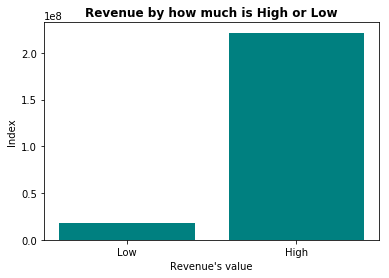

In [84]:
def revenue_value ():
    plt.bar([1,2], [mean_low, mean_high], tick_label=['Low', 'High'], color='teal')
    plt.title('Revenue by how much is High or Low', fontsize=12, fontdict={"weight": "bold"})
    plt.xlabel('Revenue\'s value')
    plt.ylabel('Index')
    
revenue_value
print(revenue_value())

With this visual, we could find the most of the movies get high revenue

# In this part, we will have a look on the best 10, directors, movies, years as per revenue or profit 


 
# Q3 |1 : Who are the 10 best directors valued by revenue ?

 * I was trying to create new column to calculate the profit, but there is was connection error, so I deleted the code & when I wrote it again, it gives me error that this coulumn is aleadry exist & sometimes gives me no erorrs,so I stopped using this code & column
 * I am a little afraid that it may interept my work, so I gonna try it after submitting the project, I just use it one time

In [76]:
prt = df_merged['revenue'] - df_merged['budget']
df_merged.insert(4,'Profit' , prt, allow_duplicates = False)
df_merged= df_merged.query('Profit >= 0')
df_merged.head(1)

,,imdb_id,popularity,budget,revenue,Profit,original_title,director,runtime,production_companies,release_year,genres_adj
id,,,,,,,,,,,,
135397,0,tt0369610,32.985763,150000000,1513528810,1363528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,2015,Action


Create new column which calculate the profit (the difference between  budget & revenue)

In [77]:
top_directors = df.nlargest(n=12, columns =['revenue'])

Getting the value of top 10 directors using nlargest

Text(0,0.5,'director')

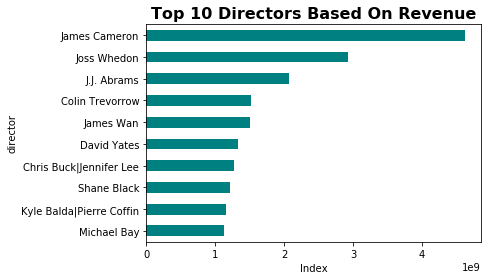

In [78]:
top_directors.groupby('director').revenue.sum().sort_values().plot(kind='barh', color='teal')
plt.title('Top 10 Directors Based On Revenue', fontsize=16, fontdict={"weight": "bold"})
plt.xlabel('Index')
plt.ylabel('director')

At this step, we get the ingo that James Cameron is the top director based on revenue & comes in 2nd place Joss Whendon

# Q3 |2 : Which are the 10 best genres valued by profit ?

In [79]:
top_genres = df_merged.nlargest(n=30, columns =['revenue'])

Defining the top 10 genres

Text(0,0.5,'Genres')

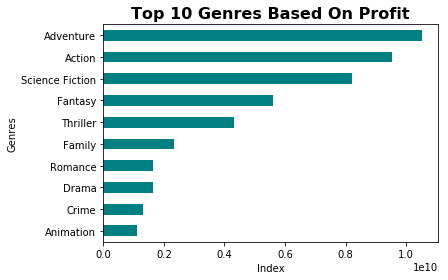

In [80]:

top_genres.groupby('genres_adj').Profit.sum().sort_values().plot(kind='barh', color='teal')
plt.title('Top 10 Genres Based On Profit', fontsize=16, fontdict={"weight": "bold"})
plt.xlabel('Index')
plt.ylabel('Genres')


Here we found that advanture & action are on the top genres based on profit

# Q3 |3 : Which are the 10 best movies valued by revenue ?

 This was my main code to visualize the data, but it stopped working suddenly & I tried to update seaborn, but always I am getting same error "module 'seaborn' has no attribute 'catplot' "
** these are the codes I used for ths error
* 1-!pip3 install seaborn==0.9.0
* 2-!pip install -U seaborn
* 3-!pip install seaborn --upgrade
 

** I will leave this code cause I spent a lot of time to set it & if there is any solution, I would appreciate it 

* plot = sns.catplot(x= 'original_title', y= 'revenue', kind = 'bar', palette="ch:.25", data=top_movies)
* plt.gcf().set_size_inches(12.7, 5.27)
* plt.xticks(rotation=80)
* plot.fig.suptitle(" Top 10 movies ",fontsize=16, fontdict={"weight": "bold"})

In [44]:
top_movies = df.nlargest(n=10, columns=['revenue'])

Getting the top 10 movies

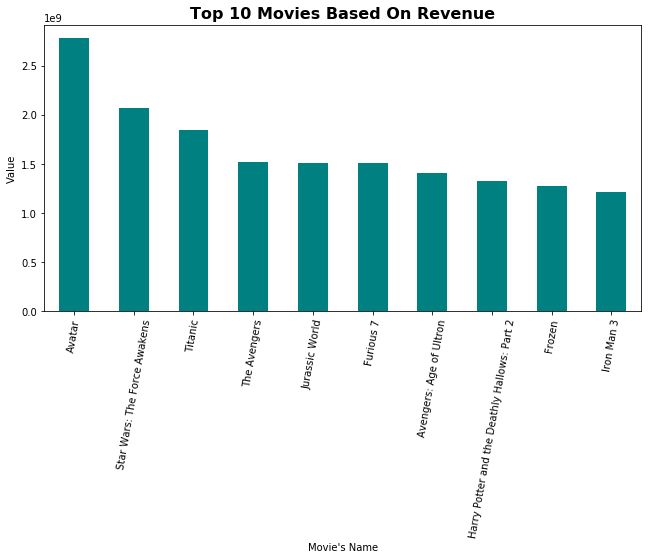

In [45]:
top_movies.groupby('original_title').revenue.sum().sort_values(ascending=False).plot(kind='bar', color = 'teal')
plt.xlabel('Movie\'s Name')
plt.xticks(rotation = 80)
plt.ylabel('Value')
plt.title('Top 10 Movies Based On Revenue', fontsize=16, fontdict={"weight": "bold"})
plt.gcf().set_size_inches(10.7, 5.27)

Avata is the movie which get the higher revenue ever since 1966 & Stars Wars comes in 2nd place

# Q3 |4 : Which  years are the 10 best valued by revenue ?

** this is the seaborn code for this question

* plot = sns.catplot(x="release_year", y="revenue", kind="swarm", s = 10,  data=top_years)
* plt.gcf().set_size_inches(8.7, 5.27)
* plt.xticks(rotation=80)
* plot.set(xlabel='Year', ylabel='Index ' )
* plot.fig.suptitle('Top 10 years based on their revenue', fontsize=16, fontdict={"weight": "bold"})
                  

In [46]:
top_years = df.nlargest(n=20, columns=['revenue'])

Extracting the top 10 years based on revenues

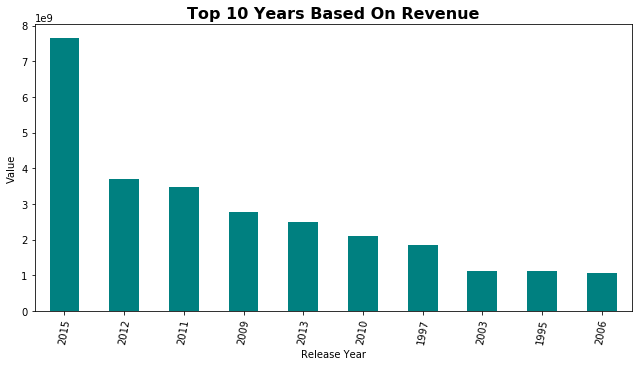

In [47]:
top_years.groupby('release_year').revenue.sum().sort_values(ascending=False).plot(kind='bar', color = 'teal')
plt.xlabel('Release Year')
plt.xticks(rotation = 80)
plt.ylabel('Value')
plt.title('Top 10 Years Based On Revenue', fontsize=16, fontdict={"weight": "bold"})
plt.gcf().set_size_inches(10.7, 5.27)


Here, we could figure out that 2015, 2012 & 2011 are the top years based o revenue

# Conclusions

* AS conclusion, here is the data analysis summary 

>1- I found that some genres like drama & comdey are the most popular although they get low revenue & this very weired; may be this is beacuse of the 0 value in revnue, but action movies has good popularity rate as well as high revnue.
>
>2- Most of movies get high revenue & it's mainly was in the years after 2000.


# Limitation

* I figure out some issues with the data; let's assume it:

>1- There was too many zero values in revenue & budget; that's actually casue me problem because I thought that it's not accurate to get the mean & fill the missing data with that mean, so I excluded any zero value & I dealt with the rest of data as it was a sample, but if this data was available, the analysis would be more effective & accurate
>
>2- It was just headache to split columns with multiple data


In [85]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0